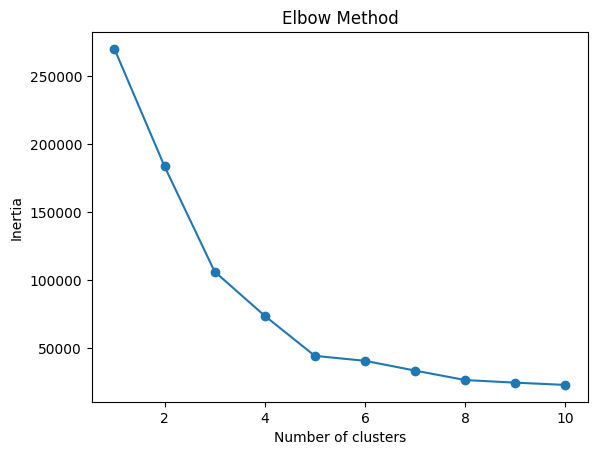

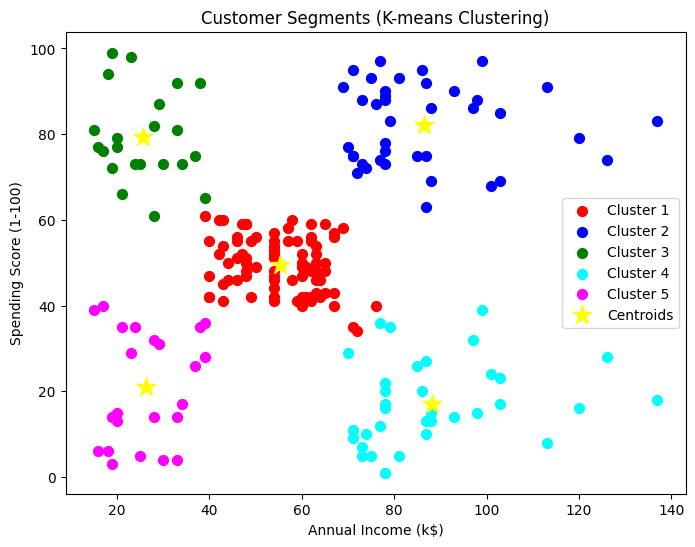

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# 2. Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Find the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# 4. Fit K-means with the chosen number of clusters (commonly 5 for this dataset)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

# 5. Visualize the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(
        X[df['Cluster'] == i]['Annual Income (k$)'],
        X[df['Cluster'] == i]['Spending Score (1-100)'],
        s=50, c=colors[i], label=f'Cluster {i+1}'
    )
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='yellow', label='Centroids', marker='*'
)
plt.title('Customer Segments (K-means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
